In [90]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
import ujson
import os
from scipy.cluster.hierarchy import to_tree




Defines the function that generates the tree.

In [91]:
def plot_dendrogram(distance_matrix, labels, linkage="single",
                truncate_level=-1, figure_size=(20, 15),
                dpi=300, savefig=False, fig_name="output.png"):
    
    cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                                compute_full_tree=True, linkage=linkage, compute_distances=True)
    print("labels: ", labels)
    cl.fit(distance_matrix)
        
    kwarg = {"truncate_mode": "level", "p": truncate_level, "orientation": "right", "labels": labels}
        
    n_samples = len(cl.labels_)
    counts = np.zeros(cl.children_.shape[0])
    plt.figure(figsize=figure_size, dpi=dpi)
    for i, merge in enumerate(cl.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

        linkage_matrix = np.column_stack(
            [cl.children_, cl.distances_, counts]
        ).astype(float)
        dendrogram(linkage_matrix, **kwarg)
        # Convert hierarchical clustering result to tree structure
        #tree = to_tree(linkage_matrix)
        pass
    tree = to_tree(linkage_matrix)
    newick_tree = tree_to_newick(tree, labels, tree.dist)
    print(newick_tree)
    if savefig is True:
        plt.savefig(fig_name)
        

Covert the trees to newick format trees

In [92]:
def tree_to_newick(node, labels, height):
    if node.is_leaf():
        return labels[node.id]
    left_str = tree_to_newick(node.left, labels, node.dist)
    right_str = tree_to_newick(node.right, labels, node.dist)
    return f"({left_str}:{height - node.dist},{right_str}:{node.dist})"

Define the distance matrix using formula distance = 1/(r^n), where n is the entries in similarity matrix and r is a parameter

In [93]:
def d1(similarity: np.ndarray, r: float) -> np.ndarray:
    #ret = 1/similarity
    ret = 1/np.power(r, similarity)
    np.fill_diagonal(ret, 0)
    return ret

# def d1(csv_file_path):
#     # Load the CSV file into a DataFrame
#     df = pd.read_csv(csv_file_path)

#     # Calculate the number of rows
#     num_rows = df.shape[0]

#     # Initialize an empty distance matrix
#     distance_matrix = np.zeros((num_rows, num_rows))

#     # Calculate the distance matrix based on your formula
#     for i in range(num_rows):
#         for j in range(num_rows):
#             row_sum_i = np.sum(df.iloc[i, :])
#             row_sum_j = np.sum(df.iloc[j, :])
#             similarity_ij = df.iloc[i, j]

#             # Calculate the distance using your formula
#             distance_ij = np.sqrt(row_sum_i * row_sum_j) / similarity_ij

#             # Assign the distance value to the distance matrix
#             distance_matrix[i, j] = distance_ij

#     return distance_matrix

Read the simiarity matrix from csv files. Can replace the csv file to get different distance matrices (with "similarity_journals.csv" or "similarity_references.csv")

In [94]:
#f_collab_distance = os.path.join(data_dir, "common_journals_.csv")
#df_collab_distance = pd.read_csv("similarity_journals.csv")
df_collab_distance = pd.read_csv("similarity_references.csv")
faculties = list(df_collab_distance.columns)    # Obtain a list of facauty names
faculties.pop(0)
print("faculties: ", faculties)
faculties = [faculty.replace(" ", "_") for faculty in faculties]
df_collab_distance.columns = [''] + faculties

faculties:  ['Ahlgren Scott D.', 'Albin Pierre', 'Balogh József', 'Baryshnikov Yuliy M.', 'Berwick-Evans Daniel', 'Boca Florin-Petre', 'Bradlow Steven Benjamin', 'Bronski Jared C.', 'Cooney Daniel B.', 'De Ville R E Lee', 'Dey Partha Sarathi', 'Di Francesco Philippe', 'Dodd Christopher', 'Dunfield Nathan M.', 'Dutta Sankar Prasad', 'Duursma Iwan Maynard', 'Erdoğan Mehmet Burak', 'Fadina Tolulope', 'Feng Runhuan', 'Fernandes Rui Loja', 'Ford Kevin B.', 'Guzman Rosemary K.', 'Haboush William J.', 'Heller Jeremiah Ben', 'Hinkkanen Aimo', 'Hirani Anil N.', 'Hung Pei-Ken', 'Hur Vera Mikyoung', 'Ivanov Sergei Vladimirovich', 'Janda Felix', 'Jing Xiaochen', 'Junge Marius', 'Katz Sheldon H.', 'Kedem Rinat', 'Kerman Ely', 'Kirkpatrick Kay Lene', 'Kirr Eduard', 'Kostochka Alexandr V.', 'Kutzarova Denka N.', 'La Nave Gabriele', 'Laugesen Richard Snyder', 'Leditzky Felix', 'Lerman Eugene M.', 'Liu Yuan', 'Li Xiaochun', 'Mc Carthy Randy', 'Mineyev Igor', 'Nikolaev Igor G.', 'Oikhberg Timur', 'Pasca

Obtain distance matrix. Plot out the tree graph corresponding to the distance matrix.

[[0.         1.         1.         ... 1.         0.00115112 1.        ]
 [1.         0.         1.         ... 1.         0.7513148  0.90909091]
 [1.         1.         0.         ... 0.90909091 0.46650738 1.        ]
 ...
 [1.         1.         0.90909091 ... 0.         0.82644628 0.90909091]
 [0.00115112 0.7513148  0.46650738 ... 0.82644628 0.         0.82644628]
 [1.         0.90909091 1.         ... 0.90909091 0.82644628 0.        ]]
labels:  ['Ahlgren_Scott_D.', 'Albin_Pierre', 'Balogh_József', 'Baryshnikov_Yuliy_M.', 'Berwick-Evans_Daniel', 'Boca_Florin-Petre', 'Bradlow_Steven_Benjamin', 'Bronski_Jared_C.', 'Cooney_Daniel_B.', 'De_Ville_R_E_Lee', 'Dey_Partha_Sarathi', 'Di_Francesco_Philippe', 'Dodd_Christopher', 'Dunfield_Nathan_M.', 'Dutta_Sankar_Prasad', 'Duursma_Iwan_Maynard', 'Erdoğan_Mehmet_Burak', 'Fadina_Tolulope', 'Feng_Runhuan', 'Fernandes_Rui_Loja', 'Ford_Kevin_B.', 'Guzman_Rosemary_K.', 'Haboush_William_J.', 'Heller_Jeremiah_Ben', 'Hinkkanen_Aimo', 'Hirani_Anil_N.', 

/Users/haoyuanli/opt/anaconda3/envs/combzero/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


(Quan_Zhiyu:0.0,(Wei_Wei:0.17355371900826455,(Guzman_Rosemary_K.:0.07513148009015791,(Fadina_Tolulope:0.0,(Cooney_Daniel_B.:0.0,(Hung_Pei-Ken:0.06830134553650702,(Nikolaev_Igor_G.:0.06209213230591559,(Haboush_William_J.:0.0,(Liu_Yuan:0.05644739300537771,(Dutta_Sankar_Prasad:0.0,(Dodd_Christopher:0.05131581182307077,(La_Nave_Gabriele:0.04665073802097336,(Duursma_Iwan_Maynard:0.0,(Young_Amanda:0.04240976183724854,(Wu_Xuan:0.0,(Bradlow_Steven_Benjamin:0.0,((Pascaleff_James_Thomas:0.18769862052939645,(Janda_Felix:0.09631907090536453,Katz_Sheldon_H.:0.10152559799477044):0.19784466890013497):0.03855432894295313,(Dey_Partha_Sarathi:0.0,(Albin_Pierre:0.0,(((Rasmussen_Sarah_Dean:0.28192024220986894,(Dunfield_Nathan_M.:0.006351286322354584,Rasmussen_Jacob:0.0013928512044641475):0.007744137526818732):0.06082951974470452,(Ivanov_Sergei_Vladimirovich:0.19736838155962366,Mineyev_Igor:0.09229599817706402):0.2896643797366877):0.03504938994813922,((Di_Francesco_Philippe:0.3186308092297601,Kedem_Rinat:8

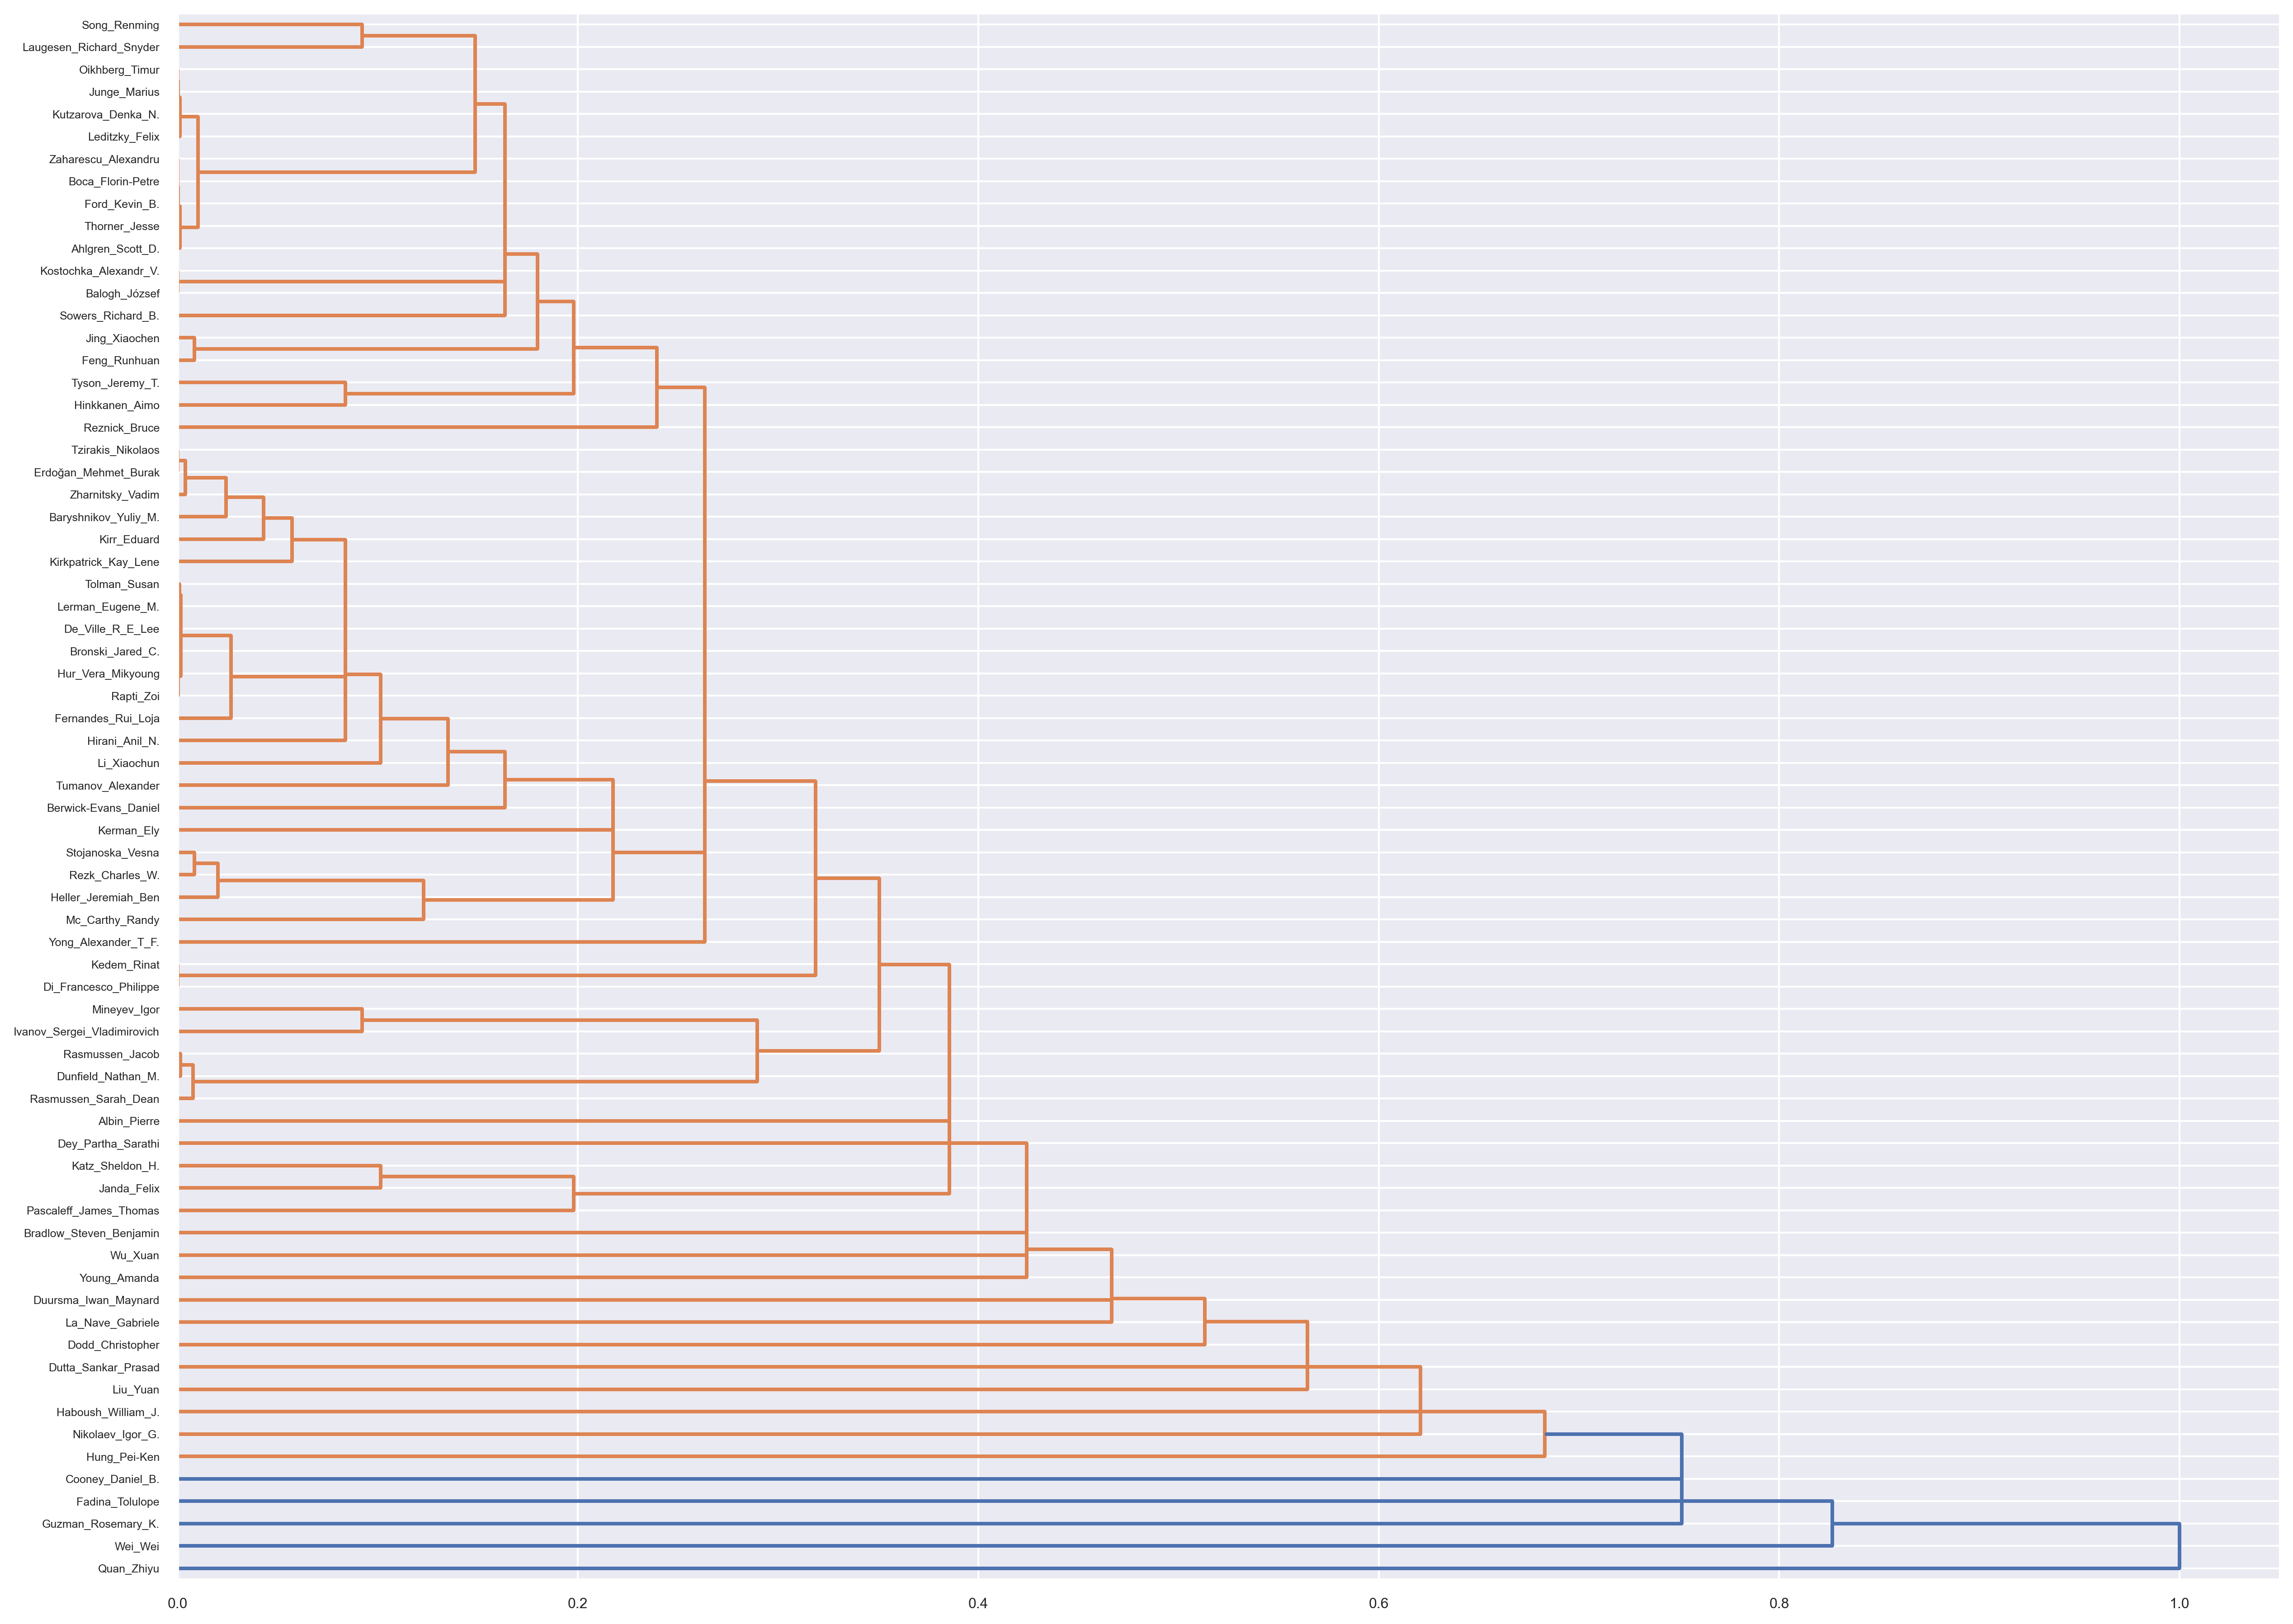

In [95]:

sim_com_ref = df_collab_distance[faculties].to_numpy()
distance_matrix = d1(sim_com_ref,1.1)
print(distance_matrix)
plot_dendrogram(d1(sim_com_ref,1.1), faculties, linkage="single")

In [58]:
# Save hierarchical clustering result as Newick format tree
from scipy.cluster.hierarchy import to_tree

linkage_matrix = linkage(distance_matrix, method='single', metric='euclidean')
# Convert hierarchical clustering result to tree structure
tree = to_tree(linkage_matrix)

/var/folders/yd/4wkp6hlx4yd2fdr1xgr69d540000gn/T/ipykernel_13180/851409798.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='single', metric='euclidean')


In [59]:
def to_newick(node):
    if node.is_leaf():
        return f"{faculties[node.id]}:{node.dist}"
    left_str = to_newick(node.left)
    right_str = to_newick(node.right)
    return f"({left_str},{right_str}):{node.dist}"

print("*****Newick format tree*****")
print(to_newick(tree))

*****Newick format tree*****
((Marius_Junge:0,(Denka__Kutzarova:0,Timur_Oikhberg:0):1.088930380882548):1.3419706787453174,((Runhuan_Feng:0,Xiaochen_Jing:0):0.8027391065139674,((Kevin_Ford:0,(Alexandru_Zaharescu:0,(Florin_P._Boca:0,(Scott__Ahlgren:0,Jesse_Thorner:0):1.0008211237761966):1.1285950112264946):1.159935680863206):1.3459235266377139,(Anil__Hirani:0,(Ely_Kerman:0,(Yuliy_Baryshnikov:0,((Randy_McCarthy:0,(Matthew_Ando:0,(Charles__Rezk:0,(Vesna_Stojanoska:0,Jeremiah__Heller:0):0.6691466038357435):0.7430380807744034):0.7934200072370993):1.1632559463073733,((Vadim_Zharnitsky:0,((Vera_Mikyoung_Hur:0,(Lee_DeVille:0,(Zoi_Rapti:0,Jared__Bronski:0):1.1505128756785765):1.243568960170956):1.2451261865351166,(Kay__Kirkpatrick:0,(M._Burak__Erdoğan:0,Nikolaos_Tzirakis:0):0.9533850266658473):1.294359401026772):1.3074724405231308):1.4458541702526624,((Eduard-Wilhelm_Kirr:0,(Felix_Leditzky:0,((Iwan_M._Duursma:0,((Sheldon_Katz_H.:0,James_Pascaleff:0):0.9561416141821982,(Christopher__Dodd:0,Sankar

In [60]:
print(distance_matrix)

[[0.         0.7513148  1.         ... 1.         1.         1.        ]
 [0.7513148  0.         0.90909091 ... 0.56447393 1.         0.90909091]
 [1.         0.90909091 0.         ... 0.90909091 1.         1.        ]
 ...
 [1.         0.56447393 0.90909091 ... 0.         1.         1.        ]
 [1.         1.         1.         ... 1.         0.         1.        ]
 [1.         0.90909091 1.         ... 1.         1.         0.        ]]


In [61]:
import matplotlib.pyplot as plt

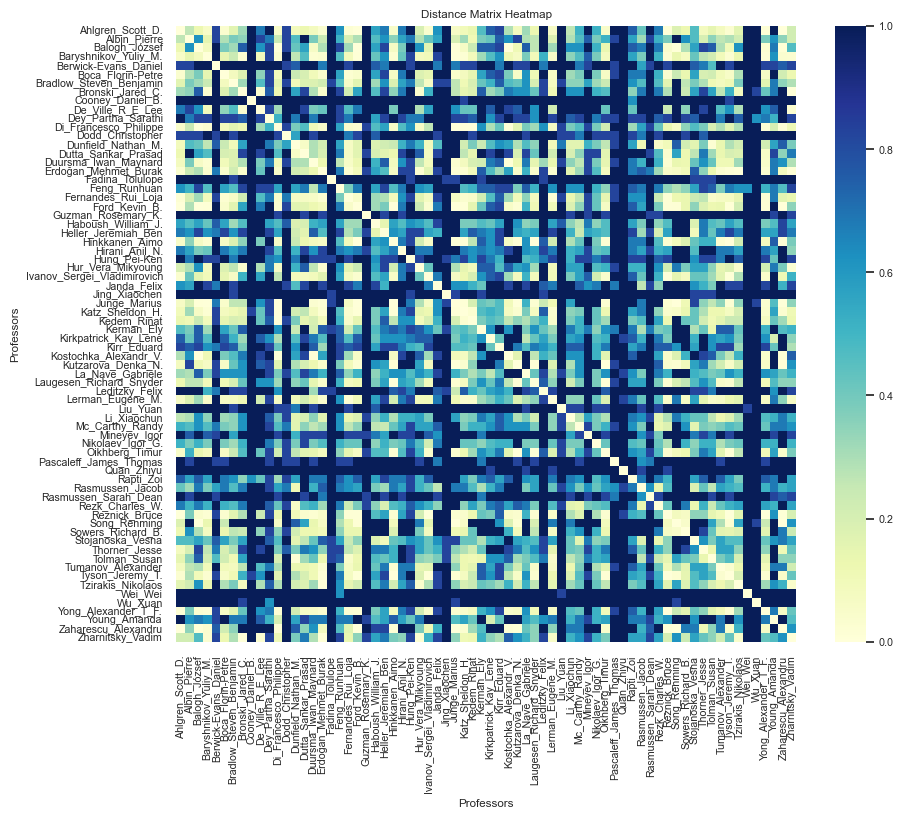

In [76]:
import seaborn as sns

sns.set(font_scale=0.7)  
plt.figure(figsize=(10, 8))  
sns.heatmap(distance_matrix, cmap="YlGnBu")


plt.xticks(ticks=np.arange(len(faculties)) + 0.5, labels=faculties, rotation=90)
plt.yticks(ticks=np.arange(len(faculties)) + 0.5, labels=faculties, rotation=360)

plt.xlabel('Professors')
plt.ylabel('Professors')

plt.title('Distance Matrix Heatmap') 

plt.show()

<AxesSubplot: >

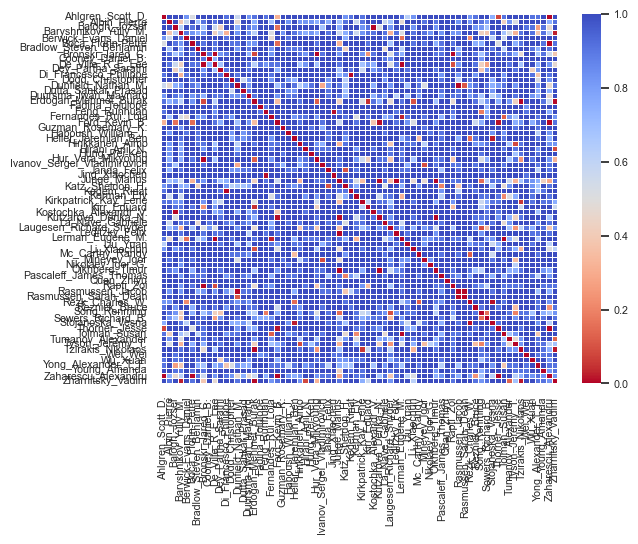

In [96]:
sns.heatmap(distance_matrix, cmap='coolwarm_r', annot=False, linewidths=.5, xticklabels=faculties, yticklabels=faculties)